<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de países

Crear un modelo de segmentación para la clasificación de paises por categoría (desarrollado, en desarrollo, subdesarollado) según sus datos a nivel macro<br>
v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [3]:
if os.access('Country-data.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv > Country-data.csv
    else:
        !wget Country-data.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv

### `Country-data.csv`:
El dataset **`Country-data.csv`** contiene datos a nivel macroeconomía, ingresos y poblacional sobre países del mundo para su segmentación.<br>
[Dataset source](Country-data.csvn)
- **country** --> nombre del país
- **child_mort** --> cuantos niños menores a 5 años mueren de cada 1000
- **exports** --> exportación de bienes y servicios per cápita
- **health** --> inversiones en salud per cápita
- **import** --> importación de bienes y servicios per cápita
- **Income** --> ingresos por persona (neto)
- **Inflation** --> inflación anual
- **life_expec** --> Promedio de expectativa de vida
- **total_fer** --> Cuantos niños por pareja hay en promedio
- **gdpp** --> Producto bruto interno per cápita

In [4]:
df = pd.read_csv("Country-data.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [7]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
print('Hay ', df.shape[0],'filas, y', df.shape[0]*df.shape[1], 'datos totales para analizar' )
df.shape

Hay  167 filas, y 1670 datos totales para analizar


(167, 10)

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [8]:
# Observar todas las relaciones entre el feature del producto bruto interno
# y los siguientes features
# Utilizar pairplot con y_vars=['gdpp']
# Utilizar pairplot con x_vars=['exports', 'income', 'life_expec', 'inflation']
# Recordar desactivar la diagonal(diag_kind=None,)

Deberían observar que a medida que aumenta el producto bruto interno aumenta la exportación, el ingreso por persona (incoma), la expectativa de vida (life_expec) y baja la inflación (inflation). Este parámetro lo debe utilizar luego para determinar si los paises segmentados son:
- desarrollados
- en_desarrollo
- subdesarrollados

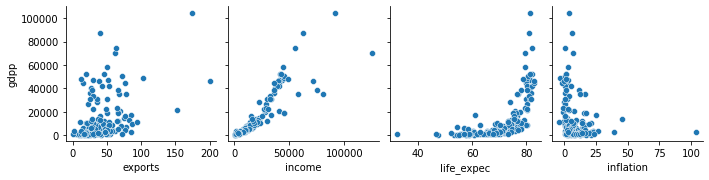

In [28]:
sns.pairplot(data=df , y_vars=['gdpp'] , x_vars=['exports', 'income', 'life_expec', 'inflation'] , diag_kind=None )

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [10]:
# Almuno: Crear un numpy array "X" con los features de entrada expecto el nombre del pais (country)
X = df.drop(['country'],axis=1)


#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [11]:
# Almuno: Entrenar un modelo de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = list(range(2,11))
ensayos = len(n_clusters)

ssd = np.zeros((ensayos))
score= np.zeros((ensayos))

for i in range(ensayos):
    kmeans = KMeans(n_clusters=n_clusters[i], init='k-means++' ,random_state=0)
    kmeans.fit(X)
    ssd[i] = kmeans.inertia_
    score[i] = silhouette_score(X, kmeans.labels_)

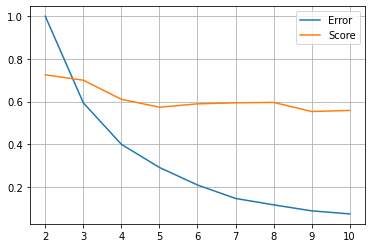

In [12]:
# Dibujar la evolucion del error (inertia) y deteminar el 
# punto de quiebre (elbow point)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n_clusters , ssd/ssd.max(), label = 'Error')
ax.plot(n_clusters, score, label='Score')
ax.grid('dashed')
ax.legend()
plt.show()

Se puede observar que el punto de elbow podría ser con cluster=4, pero ya sabemos de ante mano que queremos dividir el dataset en 3 grupos, utilizaremos n_clusters=3

In [13]:
# Alumno: Entrenar el modelo con el mejor n_clusters=3
# y determinar los labels
kmeans = KMeans(n_clusters=3, init='k-means++' ,random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)


In [14]:
# Alumno: Sumar la columna de labels con el nombre de countryseg (customer segmentation)
# a su dataset
df['countryseg'] = labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [15]:
# Alumno: Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.7003508054481694

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

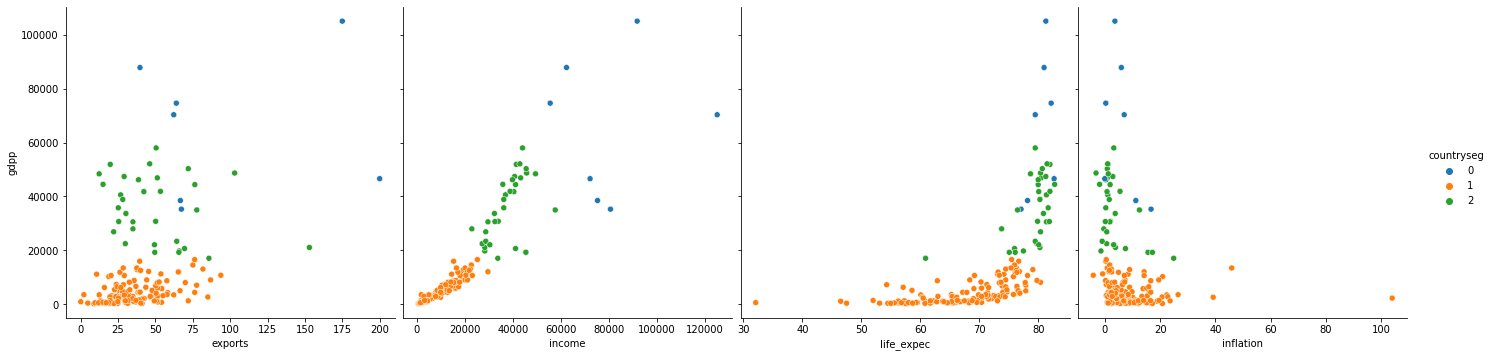

In [24]:
# Alumno: Volver a repetir el gráfico de pairplot que realizó antes
# con ['exports', 'income', 'life_expec', 'inflation']
# pero ahora utilizando para hue la columna countryseg
sns.pairplot(data=df , y_vars=['gdpp'] , x_vars=['exports', 'income', 'life_expec', 'inflation'],height=5 ,hue='countryseg',  diag_kind=None , palette='tab10' )
plt.show()

In [17]:
# Alumno: viendo los gráficos, principalmente el de ingresos (income), deteminar
# la categoría de cada cluster y colocarla en una columna countrycat.
# Utilizar lambda expresion en función de country_seg para crear
# esa nueva coulmna
# - desarrollado
# - desarrollandose
# - subdesarrollado

In [20]:
df['countrycat'] = df['countryseg'].apply(lambda x: 'desarrollado' if x==0 else 'desarrollandose' if x==2 else 'subdesarrollado')

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg,countrycat
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,subdesarrollado
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,subdesarrollado
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,subdesarrollado
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,subdesarrollado
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,subdesarrollado


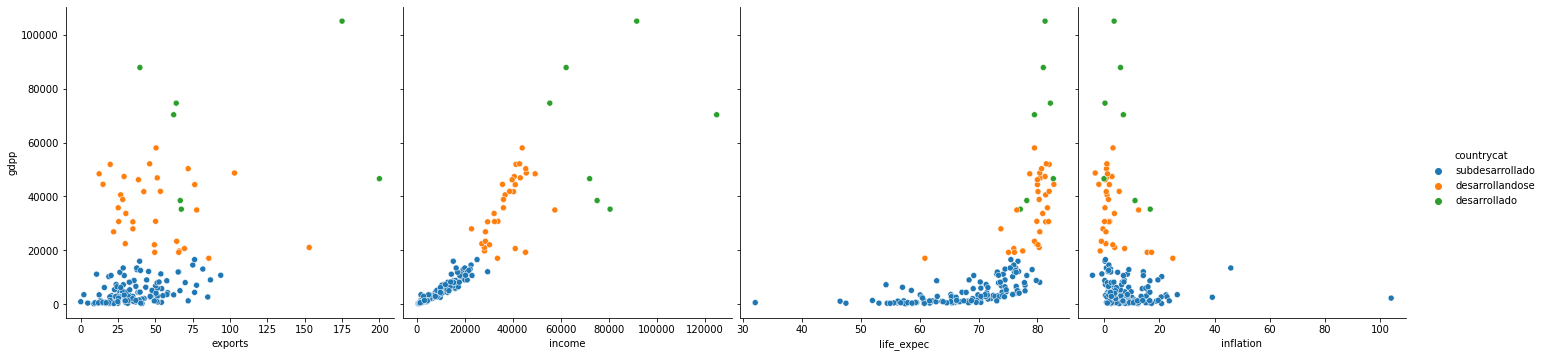

In [21]:
# Alumno: volver a graficar el gráfico anterior pero ahora usando en 
# en hue = 'countrycat'
sns.pairplot(data=df , y_vars=['gdpp'] , x_vars=['exports', 'income', 'life_expec', 'inflation'],height=5 ,hue='countrycat' , diag_kind=None , palette='tab10' )

subdesarrollado    128
desarrollandose     32
desarrollado         7
Name: countrycat, dtype: int64


<AxesSubplot:xlabel='countrycat', ylabel='count'>

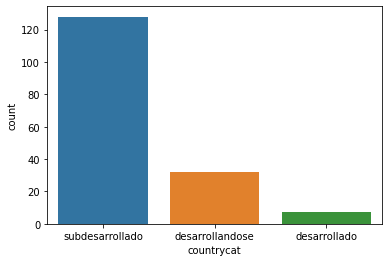

In [22]:
# Alumno: Determinar cuantas países hay en cada categoría
# utilizando el gráfico de seaborn countplot en la columna countrycat
x =df['countrycat'].value_counts()
print(x)
sns.countplot(x=df['countrycat'])

Bueno ahora a jugar! Ahora puede buscar en su dataset algún país en general y ver su categoría según el modelo que armó

In [23]:
import gradio as gr
paises=[]
for i in range(len(df['country'])):
    paises.append(str(df['country'][i]))


def desarrollo(pais):
    
  
    x = df[df['country']== pais]['countrycat']
    
    return x#[0]
        

iface = gr.Interface(
    fn=desarrollo,
   
    inputs=[gr.inputs.Dropdown(paises)],
    outputs="text",
    layout="vertical")

iface.launch()

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


Tip: Add interpretation to your model by simply adding `interpretation="default"` to `Interface()`


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">